In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2
a = np.load('pose_result__data_paper_180918_MDN_PR_Fly1_001_SG1_behData_images.pkl')
data = a['points3d'].copy()
print('The dimension is ')
print(data.shape)

The dimension is 
(899, 38, 3)


In [3]:
def intersection_angle(a,b):
    return np.arccos(a@b/np.linalg.norm(a)/np.linalg.norm(b))
def ag2(angle):
    return angle/np.pi*180
def rotaMatr(v1,v2):
    u = np.cross(v1,v2)
    u = u/np.linalg.norm(u)
    th = intersection_angle(v1,v2)
    r = np.zeros((3,3))
    c = np.cos(th)
    s = np.sin(th)
    ux = u[0]
    uy = u[1]
    uz = u[2]
    r[0,0] = c + ux**2*(1-c)
    r[0,1] = ux*uy*(1-c) - uz*s
    r[0,2] = ux*uz*(1-c) + uy*s
    
    r[1,0] = ux*uy*(1-c) + uz*s
    r[1,1] = c + uy**2*(1-c)
    r[1,2] = uy*uz*(1-c) - ux*s
    
    r[2,0] = uz*ux*(1-c) - uy*s
    r[2,1] = uz*uy*(1-c) + ux*s
    r[2,2] = c + uz**2*(1-c)
    return r
def set_coord():
    v_ref = np.array([0,0,1])
    v1 = data[0,0,:] - data[0,19,:]
    v2 = data[0,5,:] - data[0,24,:]
    v3 = data[0,10,:] - data[0,29,:]
    v4 = data[0,15,:] - data[0,34,:]
    print(ag2(intersection_angle(v_ref,v1)))
    print(ag2(intersection_angle(v_ref,v2)))
    print(ag2(intersection_angle(v_ref,v3)))
    print(ag2(intersection_angle(v_ref,v4)))
    xx = v1+v2+v3+v4
    x_ref = xx/np.linalg.norm(xx)
    print(x_ref)
    x_ref[1] = 0
    print(x_ref)
    print('x-axis angel: ',ag2(intersection_angle(v_ref,x_ref)))
    return x_ref
def interpolation(data, t, leg, pos, num):
    '''pos = 0,1,2,3  t = 0 , leg = left:0, 5, 10,  right:19, 24, 29'''
    ex_point = data[t,leg+pos,:].reshape(1,3)
    next_point = data[t,leg+pos+1,:].reshape(1,3)
    lam = np.linspace(0,1,num).reshape(num,1)
    enlarge_leg = lam * ex_point + (1 - lam) * next_point
    return enlarge_leg
def views_eachleg(data,t,leg,sch1,sch2,ax):
    # require data: (frame,  point,  dimension)
    '''meaningful input: top view:(0,2)  left view:(1,0)  front view:(1,2)'''
    mapp = np.zeros((800,800))
    for i in range(leg*4*num,(leg+1)*4*num):#range(0,data.shape[1]):  #  [0,5,19,24,10,29,15,34]:
        for j in range(-3,3):
            for k in range(-3,3):
                mapp[int(100*data[t,i,sch1]+300)+j,int(300+100*data[t,i,sch2])+k] = 10
    ax.imshow(mapp)
    #cv2.imshow('projection view',mapp)
    #cv2.waitKey(10)
def views(data,t,sch1,sch2):
    '''meaningful input: top view:(0,2)  left view:(1,0)  front view:(1,2)'''
    mapp = np.zeros((800,800))
    for i in range(0,data.shape[1]):  #  [0,5,19,24,10,29,15,34]:
        for j in range(-3,3):
            for k in range(-3,3):
                mapp[int(100*data[t,i,sch1]+300)+j,int(300+100*data[t,i,sch2])+k] = 10
    plt.imshow(mapp)
    #cv2.imshow('projection view',mapp)
    #cv2.waitKey(10)
def views3(data,t,sch1,sch2,ax):
    '''meaningful input: top view:(0,2)  left view:(1,0)  front view:(1,2)'''
    mapp = np.zeros((800,800))
    for i in range(0,data.shape[1]):  #  [0,5,19,24,10,29,15,34]:
        for j in range(-3,3):
            for k in range(-3,3):
                mapp[int(100*data[t,i,sch1]+300)+j,int(400+100*data[t,i,sch2])+k] = 10
    ax.imshow(mapp)
    #cv2.imshow('projection view',mapp)
    #cv2.waitKey(10)
#an = 30/180*np.pi
#x_ref = np.array([np.sin(an),0,np.cos(an)])
#print(x_ref)

#coord_x = x_ref
coord_x = set_coord()
coord_y = np.array([0,-1,0])
coord_z = np.cross(coord_x,coord_y)
print('left-coordinate x :', coord_x)
print('left-coordinate y :', coord_y)
print('left-coordinate z :', coord_z)
R_std = rotaMatr(coord_x,np.array([0,0,1]))
std_data = np.zeros(data.shape)
for i in range(899):
    std_data[i,:,:] = (R_std @ (data[i,:].T)).T    
num = 15
enlarge_leg = np.zeros((899,24,num,3))
for t in range(0,899):
    i = 0
    for leg in [0,5,10,19,24,29]:
        for pos in range(4):
            enlarge_leg[t,i+pos,:,:] = interpolation(std_data,t,leg,pos,num)
        i += 4
larg_leg = enlarge_leg.reshape(899,24*num,3)

39.719173687676225
37.766569550937106
40.96779343467542
38.55254876567842
[0.62771434 0.07004704 0.77528583]
[0.62771434 0.         0.77528583]
x-axis angel:  38.99554730142681
left-coordinate x : [0.62771434 0.         0.77528583]
left-coordinate y : [ 0 -1  0]
left-coordinate z : [ 0.77528583  0.         -0.62771434]


six leg


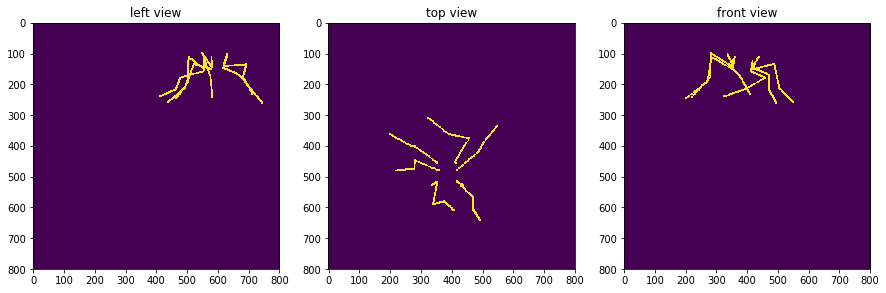

In [6]:
'''left view'''
t = 600
fig, [ax1, ax2, ax3]= plt.subplots(1, 3, figsize=(15,15))
views3(larg_leg,t,1,0,ax1)
ax1.set_title('left view')

'''top view'''
views3(larg_leg,t,0,2,ax2)
ax2.set_title('top view')

'''front view'''
views3(larg_leg,t,1,2,ax3)
ax3.set_title('front view')
print('six leg')

left front leg


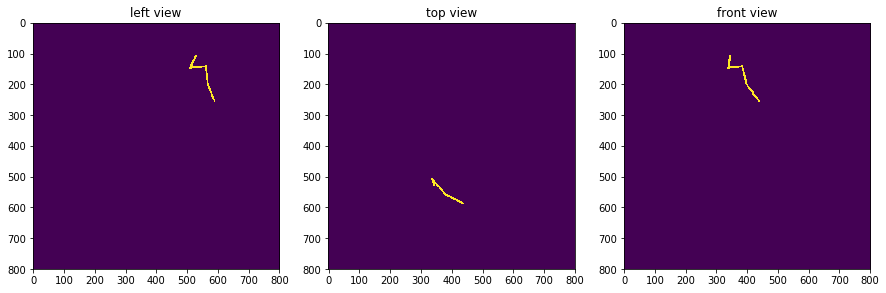

In [93]:
'''left view'''

leg = 0
fig, [ax1, ax2, ax3]= plt.subplots(1, 3, figsize=(15,15))
views_eachleg(larg_leg,t,leg,1,0,ax1)
ax1.set_title('left view')

'''top view'''
leg = 0
views_eachleg(larg_leg,t,leg,0,2,ax2)
ax2.set_title('top view')

'''front view'''
leg = 0
views_eachleg(larg_leg,t,leg,1,2,ax3)
ax3.set_title('front view')
print('left front leg')

left middle leg


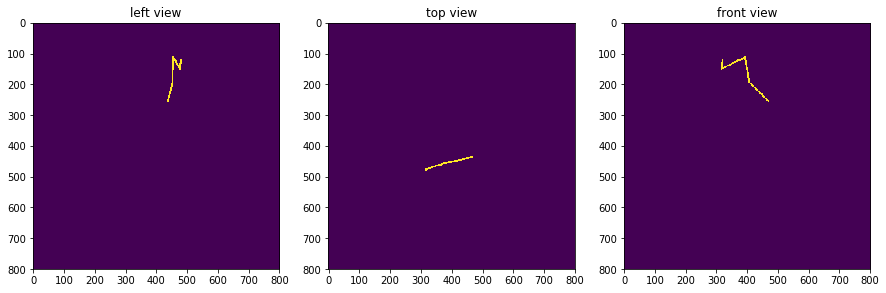

In [94]:
'''left view'''
leg = 1
t = 0
fig, [ax1, ax2, ax3]= plt.subplots(1, 3, figsize=(15,15))
views_eachleg(larg_leg,t,leg,1,0,ax1)
ax1.set_title('left view')

'''top view'''
leg = 1
views_eachleg(larg_leg,t,leg,0,2,ax2)
ax2.set_title('top view')

'''front view'''
leg = 1
views_eachleg(larg_leg,t,leg,1,2,ax3)
ax3.set_title('front view')
print('left middle leg')

left hind leg


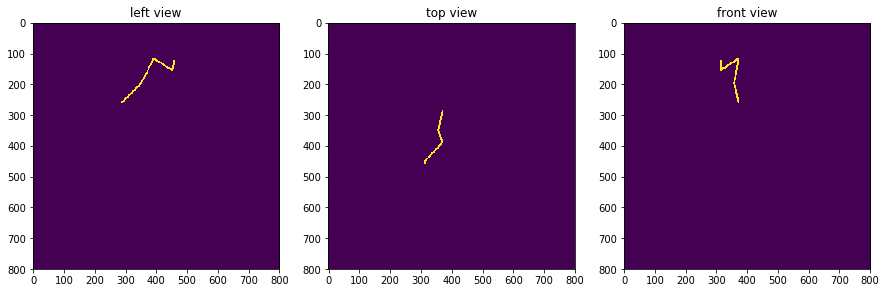

In [95]:
'''left view'''
leg = 2
fig, [ax1, ax2, ax3]= plt.subplots(1, 3, figsize=(15,15))
views_eachleg(larg_leg,t,leg,1,0,ax1)
ax1.set_title('left view')

'''top view'''
leg = 2
views_eachleg(larg_leg,t,leg,0,2,ax2)
ax2.set_title('top view')

'''front view'''
leg = 2
views_eachleg(larg_leg,t,leg,1,2,ax3)
ax3.set_title('front view')
print('left hind leg')

right front leg


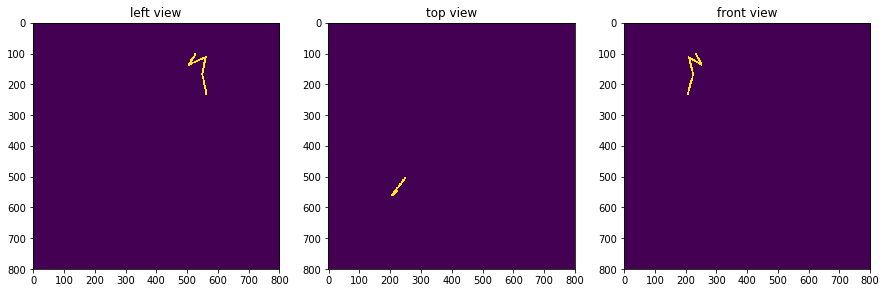

In [96]:
'''left view'''
leg = 3
fig, [ax1, ax2, ax3]= plt.subplots(1, 3, figsize=(15,15))
views_eachleg(larg_leg,t,leg,1,0,ax1)
ax1.set_title('left view')

'''top view'''
leg = 3
views_eachleg(larg_leg,t,leg,0,2,ax2)
ax2.set_title('top view')

'''front view'''
leg = 3
views_eachleg(larg_leg,t,leg,1,2,ax3)
ax3.set_title('front view')
print('right front leg')

right middle leg


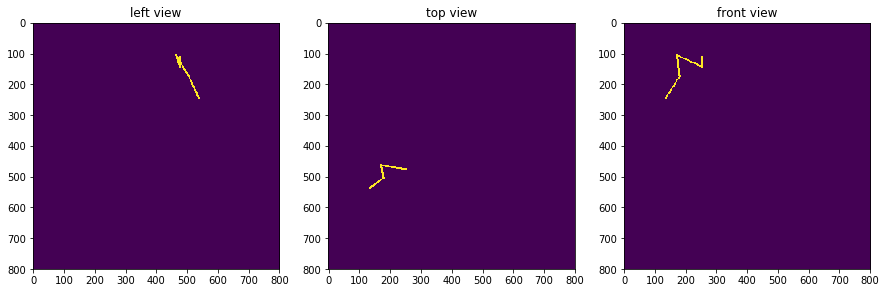

In [5]:
'''left view'''
leg = 4
t = 400
fig, [ax1, ax2, ax3]= plt.subplots(1, 3, figsize=(15,15))
views_eachleg(larg_leg,t,leg,1,0,ax1)
ax1.set_title('left view')

'''top view'''
leg = 4
views_eachleg(larg_leg,t,leg,0,2,ax2)
ax2.set_title('top view')

'''front view'''
leg = 4
views_eachleg(larg_leg,t,leg,1,2,ax3)
ax3.set_title('front view')
print('right middle leg')

right hind leg


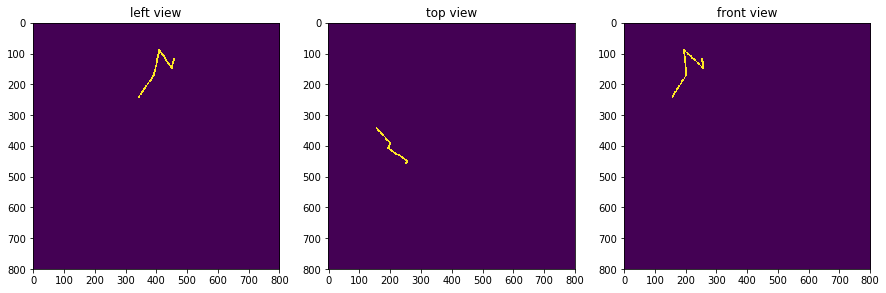

In [98]:
'''left view'''
leg = 5
fig, [ax1, ax2, ax3]= plt.subplots(1, 3, figsize=(15,15))
views_eachleg(larg_leg,t,leg,1,0,ax1)
ax1.set_title('left view')

'''top view'''
leg = 5
views_eachleg(larg_leg,t,leg,0,2,ax2)
ax2.set_title('top view')

'''front view'''
leg = 5
views_eachleg(larg_leg,t,leg,1,2,ax3)
ax3.set_title('front view')
print('right hind leg')